In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.189 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6411.3/8062.4 GB disk)


In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
# Import thư viện
import os
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO
import multiprocessing
import torch
from glob import glob

In [ ]:
# Huấn luyện mô hình Yolov10n
def main():
    model = YOLO("yolov10n.yaml")
    model.train(
        data='/kaggle/input/vietnameses-tomato-disease-dataset/YOLO/data.yaml',
        epochs=200,
        imgsz=640,
        batch=64,
        pretrained=False,
        device="cuda",
        verbose=True,
        plots=True,
        resume=True,
        
        #Tăng cường
        degrees=10,
        translate=0.1,
        scale=0.5,
        shear=2.0,
        perspective=0.001,
        flipud=0.2,
        fliplr=0.5,
        mosaic=0.8,
        mixup=0.2,
        copy_paste=0.2,
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.5
    )

if __name__ == '__main__':
    multiprocessing.freeze_support()
    main()

In [8]:
# Đánh giá mô hình trên Test
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")
model.to('cuda')

data_yaml = "/kaggle/input/vietnameses-tomato-disease-dataset/YOLO/data.yaml"

if __name__ == '__main__':
    metrics = model.val(data=data_yaml, split='test', save_json=True)

YOLOv10n summary (fused): 102 layers, 2,266,923 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.3 ms, read: 79.5±52.2 MB/s, size: 44.9 KB)


val: Scanning /kaggle/input/vietnameses-tomato-disease-dataset/YOLO/test/labels... 616 images, 0 backgrounds, 0 corrupt: 100%|██████████| 616/616 [00:00<00:00, 951.86it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/vietnameses-tomato-disease-dataset/YOLO/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.76it/s]


                   all        616       2297      0.839      0.906      0.945      0.818
          Early Blight        201        290      0.922      0.883      0.968      0.855
               Healthy         71        292      0.826      0.832      0.911      0.702
           Late Blight        162        238      0.848      0.916      0.955       0.85
            Leaf Miner        121        168       0.85      0.935      0.958      0.832
             Leaf Mold        145        245      0.825      0.894      0.936      0.818
          Mosaic Virus        164        222      0.859      0.932      0.972      0.885
              Septoria        124        182      0.768       0.94      0.929      0.866
          Spider Mites         94        163      0.859      0.963      0.969      0.852
Yellow Leaf Curl Virus        156        497      0.794      0.863      0.908      0.698
Speed: 0.6ms preprocess, 3.2ms inference, 0.0ms loss, 0.2ms postprocess per image
Saving runs/detect/val2/pred


0: 640x640 2 Early Blights, 1 Late Blight, 1 Leaf Mold, 4.2ms
1: 640x640 13 Spider Mitess, 4.2ms
2: 640x640 3 Early Blights, 4.2ms
3: 640x640 1 Early Blight, 4.2ms
4: 640x640 1 Early Blight, 2 Mosaic Viruss, 1 Septoria, 4.2ms
5: 640x640 1 Leaf Mold, 4.2ms
6: 640x640 1 Early Blight, 1 Late Blight, 1 Leaf Miner, 1 Septoria, 4.2ms
7: 640x640 1 Late Blight, 1 Mosaic Virus, 1 Septoria, 1 Yellow Leaf Curl Virus, 4.2ms
8: 640x640 1 Leaf Miner, 4.2ms
9: 640x640 6 Healthys, 4.2ms
Speed: 1.6ms preprocess, 4.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


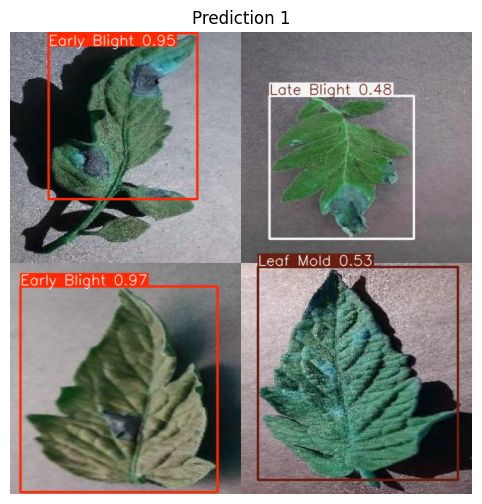

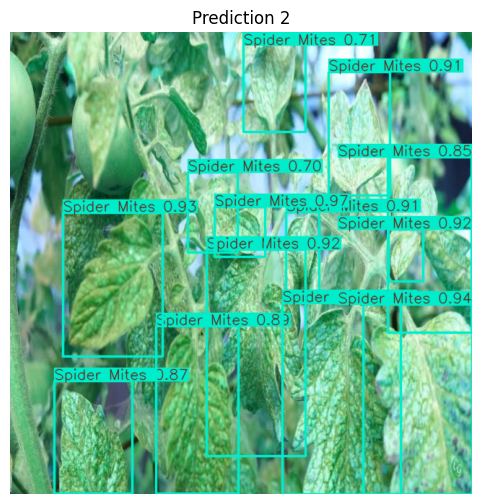

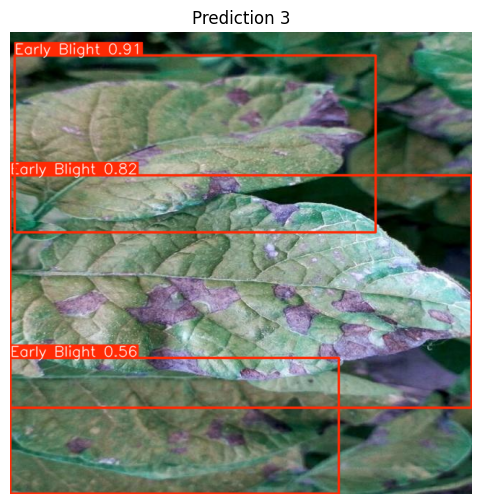

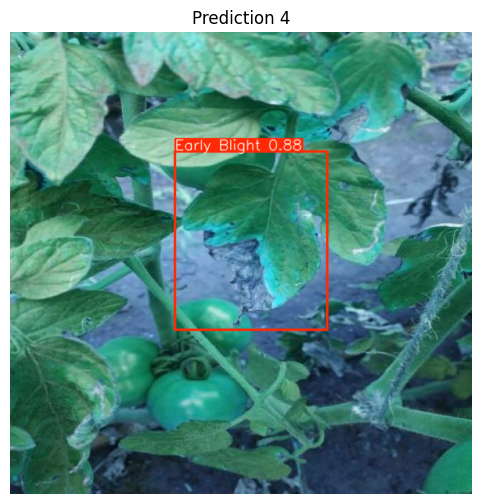

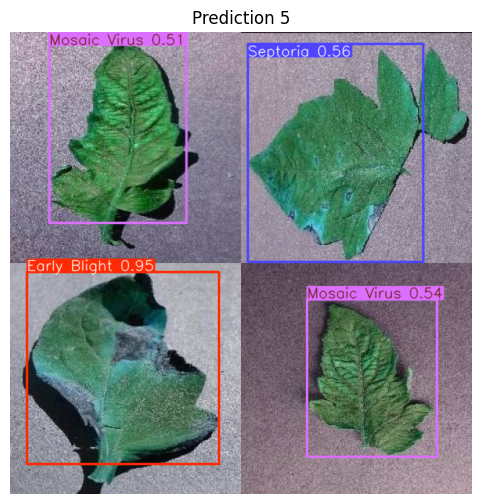

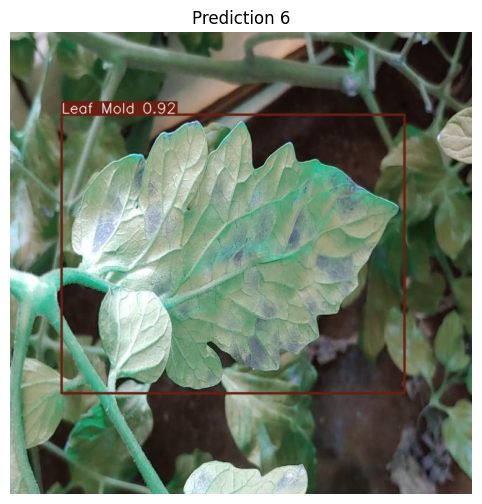

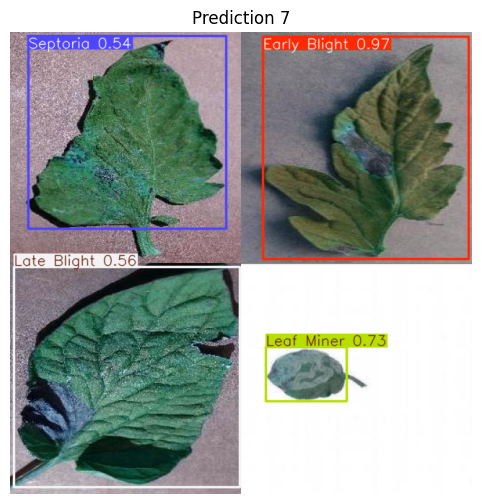

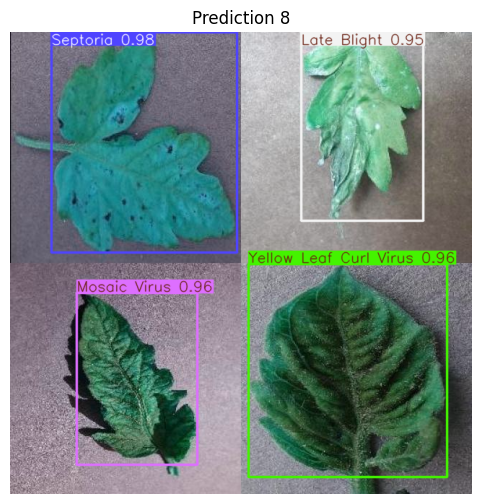

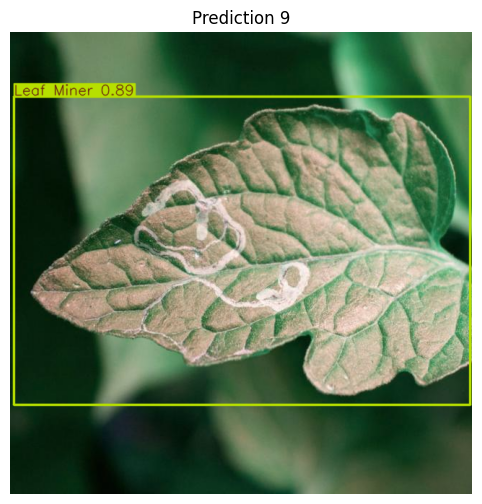

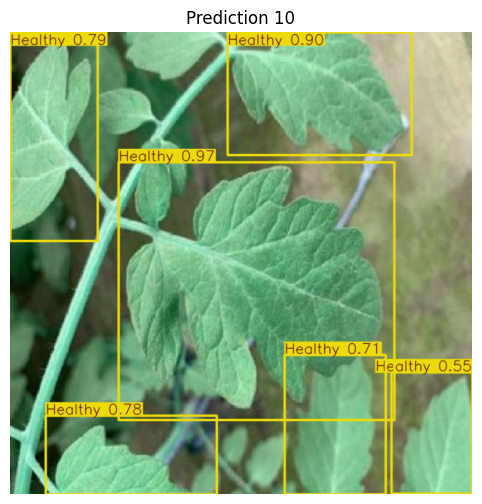

In [7]:
# Test nhận diện
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")
model.to("cuda")

test_path_abs = '/kaggle/input/vietnameses-tomato-disease-dataset/WithoutAug/test/images'

image_paths = glob(os.path.join(test_path_abs, "*.jpg")) + glob(os.path.join(test_path_abs, "*.png"))

if len(image_paths) == 0:
    raise FileNotFoundError(f"Không tìm thấy ảnh nào trong thư mục test: {test_path_abs}")

sample_images = random.sample(image_paths, min(10, len(image_paths)))

results = model.predict(sample_images, save=False, conf=0.4)

for i, result in enumerate(results):
    im = result.plot()
    plt.figure(figsize=(8, 6))
    plt.imshow(im)
    plt.axis('off')
    plt.title(f"Prediction {i+1}")
    plt.show()